In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import scipy.stats as stats
from matplotlib import gridspec
import aplpy as apl #The Astronomy Plotting Library for python
import astropy
from astropy.stats import sigma_clip
from astropy.modeling import functional_models, models, fitting
import astropy.units as U
from astropy.coordinates import ICRS, Galactic, FK4, FK5, Angle, Latitude, Longitude
import astropy.constants as C
from astropy import wcs
import astropy.io.fits as fits
from astropy.io import ascii
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.stats import signal_to_noise_oir_ccd as SNRas
#import spectral_cube as SC
#from spectral_cube import SpectralCube as sc
from astropy.wcs import WCS
matplotlib.use('Agg')
import matplotlib.cm as cm
#import astrometry as ast
import pyfits
import requests
import json
import os
from sklearn import datasets, linear_model
from scipy.optimize import curve_fit
import numpy.ma as ma
from astropy.table import Table, Column
import pyextract
import sewpy
import pandas as pd
from astropy import units as u
#import alipy

/home/lynge/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
quasJ = [os.path.join('/media/lynge/Lynge-Back-up/F51/F51H/',f) \
        for f in os.listdir('/media/lynge/Lynge-Back-up/F51/F51H/')]

qua1_RA_WORLD = SkyCoord('18:44:53.991 -62:21:52.83', unit=(u.hourangle, u.deg)).ra.degree
qua1_DEC_WORLD = SkyCoord('18:44:53.991 -62:21:52.83', unit=(u.hourangle, u.deg)).dec.degree

print qua1_RA_WORLD

sta1_RA_WORLD = SkyCoord('18:45:08.692 -62:22:19.00', unit=(u.hourangle, u.deg)).ra.degree #UCAC3 86-422902
sta1_DEC_WORLD = SkyCoord('18:45:08.692 -62:22:19.00', unit=(u.hourangle, u.deg)).dec.degree

sta2_RA_WORLD = SkyCoord('18:45:19.164 -62:25:09.22', unit=(u.hourangle, u.deg)).ra.degree #TYC 8438-1960-1
sta2_DEC_WORLD = SkyCoord('18:45:19.164 -62:25:09.22', unit=(u.hourangle, u.deg)).dec.degree

sta3_RA_WORLD = float('nan') #SkyCoord('05:16:19.315 -00:13:35.68', unit=(u.hourangle, u.deg)).ra.degree #TYC 8438-1960-1
sta3_DEC_WORLD = float('nan') #SkyCoord('05:16:19.315 -00:13:35.68', unit=(u.hourangle, u.deg)).dec.degree

sky_RA_WORLD = SkyCoord('18:45:09 -62:21:11', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky_DEC_WORLD = SkyCoord('18:45:09 -62:21:11', unit=(u.hourangle, u.deg)).dec.degree

MAG_STA1_J = 11.335
MAG_STA1_H = 10.762
MAG_STA1_K = 10.644

MAG_STA2_J = 8.290
MAG_STA2_H = 8.130
MAG_STA2_K = 8.076

MAG_STA3_J = float('nan') #8.616 #12.068
MAG_STA3_H = float('nan') #8.171 #11.855
MAG_STA3_K = float('nan') #8.018 #11.796

MAG_HD101274_J = MAG_STA1_J #float('nan')
MAG_HD101274_H = MAG_STA1_H
MAG_HD101274_K = MAG_STA1_K

MAG_HD101274_g = 9.1124
MAG_HD101274_r = 9.5110
MAG_HD101274_i = float('nan')
MAG_HD101274_z = 10.3072

MAG_TYCHO_2_7740_22_1_J = MAG_STA2_J #10.919
MAG_TYCHO_2_7740_22_1_H = MAG_STA2_H #10.726
MAG_TYCHO_2_7740_22_1_K = MAG_STA2_K #10.611

MAG_TYCHO_2_7740_22_1_g = float('nan') #13.1053 #11.7892
MAG_TYCHO_2_7740_22_1_r = float('nan') #12.702 #11.6444
MAG_TYCHO_2_7740_22_1_i = float('nan') #12.656
MAG_TYCHO_2_7740_22_1_z = float('nan') #11.5203

MAG_TYCHO_2_7740_529_1_J = MAG_STA3_J #9.902
MAG_TYCHO_2_7740_529_1_H = MAG_STA3_H #9.625
MAG_TYCHO_2_7740_529_1_K = MAG_STA3_K #9.580

MAG_UCAC3_86_422902_g = 14.731
MAG_UCAC3_86_422902_r = 13.270
MAG_UCAC3_86_422902_i = 12.955
MAG_UCAC3_86_422902_z = 13.230

MAG_HD101274_g = MAG_UCAC3_86_422902_g #9.1124
MAG_HD101274_r = MAG_UCAC3_86_422902_r #9.5110
MAG_HD101274_i = MAG_UCAC3_86_422902_i #float('nan')
MAG_HD101274_z = MAG_UCAC3_86_422902_z #10.3072

MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)


FLUX_V_VEGA_B = 4.063*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_V = 3.636*10**(-20)
FLUX_V_VEGA_G = float('nan')
FLUX_V_VEGA_J = 1.589*10**(-20)
FLUX_V_VEGA_H = 1.021*10**(-20)
FLUX_V_VEGA_K = 0.64*10**(-20)

FLUX_V_VEGA_g = 3.631*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_r = 3.631*10**(-20)
FLUX_V_VEGA_i = 3.631*10**(-20)
FLUX_V_VEGA_z = 3.631*10**(-20)


281.2249625


In [3]:
def dist(mid,end):
    return np.sqrt((mid[0] - end[0])**2 + (mid[1] - end[1])**2)

In [4]:
def flux_cal(A_mag,B_mag,B_flux):
    '''Flux of A found through magnitude and flux of B'''
    return B_flux*10**((B_mag-A_mag)/2.5)

In [5]:
def Basic(quasar,header):
    '''Provides a basic list of neccesities from the fits header file for use in the later \
    flux determination, it does not serve an individual purpose beyound that'''
    AGNdata = quasar #np.rot90(np.rot90(np.fliplr(quasar)))
    #header = data[0].header
    #print header
    RAstd = header['CRVAL1']
    DECstd = header['CRVAL2']
    #print RAstd, DECstd
    pixspa = header['PIXSCALE']/(3600.)
    #print pixspa
    RAstdpix = header['CRPIX1']
    DECstdpix = header['CRPIX2']
    exptime = 10 # header['EXPTIME']
    return header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime

In [6]:
def curve(quasar,header,w,center,apparature):
    '''Determines the FLUX of the stellar object given the the numpy array of the image, \
    the header of the fits file, the astropy coordinate representation, \
    the object position and the apparature of interest'''
    header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime = Basic(quasar,header)
    #AGNdata = np.swapaxes(AGNdata,0,1)
    y, x = np.ogrid[0:header['NAXIS1'],0:header['NAXIS1']]
    #w = np.swapaxes(w,0,1)
    #F_AGN = np.zeros((512,512,3)) #((int(2*apparature/pixspa)+1,int(2*apparature/pixspa)+1,3))
    #print center
    x1 = w.all_world2pix(center[0],center[1],0)
    x1,y1 = (x1[0]),(x1[1])
    if 15 < x1 < header['NAXIS1'] - 15 and 15 < y1 < header['NAXIS2'] - 15:
        try:
            mask = ((y-y1)**2 + (x-x1)**2) > (apparature/float(pixspa))**2
            AGNdata[mask] = float(0)
            mask = AGNdata == 0.
            rows = np.flatnonzero((~mask).sum(axis=1))
            cols = np.flatnonzero((~mask).sum(axis=0))
            AGNdata = AGNdata[rows.min():rows.max()+1, cols.min():cols.max()+1]
            #print apparature/float(pixspa)
        except:
            AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    else:
        AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    #if np.sum(AGNdata) < 500:
    #    AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    return AGNdata, x1, y1


In [7]:
def comp1(qua,sta):
    '''Code to determine the relation between the AGN and the Stellar flux as determined by either me \
    or by the SExtractor program respectively'''
    comp = qua/sta
    return comp

In [8]:
def SXtable(quas,aperture):
    header = pyfits.getheader(quas)
    phot_app = aperture*3600/header['PIXSCALE']
    np.set_printoptions(threshold=np.inf)
    sew = sewpy.SEW(params=['XMODEL_WORLD', 'YMODEL_WORLD', 'X2MODEL_WORLD', 'Y2MODEL_WORLD', 
                            'XMODEL_IMAGE', 'YMODEL_IMAGE', 'FLUX_RADIUS(1)', 'FLUX_APER','ELLIPTICITY'],
                    config={"DETECT_THRESH":5, 'DETECT_MINAREA':5, 'DETECT_MAXAREA':10000, 
                            "PHOT_FLUXFRAC":"0.5", 'PHOT_APERTURES':2*phot_app, 
                            'PIXEL_SCALE':header['PIXSCALE']}
                    , sexpath='/usr/bin/sextractor')
    out = sew(quas)
    return out

In [9]:
def flux(quas,aperture,main_RA_WORLD,main_DEC_WORLD):
    header = pyfits.getheader(quas)
    RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[0]
    DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[1]
    output = float('nan')
    if 15 < RAmain < header['NAXIS1'] - 15 and 15 < DECmain < header['NAXIS2'] - 15: 
        out = SXtable(quas,aperture)
        RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[0]
        DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[1]
        #print out['table']['XMODEL_IMAGE'], out['table']['YMODEL_IMAGE']
        #print RAmain, DECmain

        for j in range(len(out['table']['XMODEL_IMAGE'])):
            #output['time'][i] = header['MJD-OBS']
            if RAmain - 5. < out['table']['XMODEL_IMAGE'][j] <  RAmain + 5. and \
            DECmain - 5. < out['table']['YMODEL_IMAGE'][j] < DECmain + 5.:
                #print 'YES'
                output = out['table']['FLUX_APER'][j]
                break
    else:
        output = float('nan')
        #print 'Done'
    return output


In [10]:
def SNR(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN'])*data1_2*header['DIT']*header['NDIT']/(np.sqrt
                                                        (float(header['GAIN'])*data1_2*header['DIT']*header['NDIT'] 
                                                         + float(header['GAIN'])*npix1*data2_2*header['DIT']
                                                         *header['NDIT']
                                                         +header['NDIT']*npix1*header['RON']**2))

def SNR11(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['DIT']*header['NDIT']))

def SNR22(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN']*npix1*data2_2*header['DIT']*header['NDIT'])

def SNR33(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float((header['NDIT']*npix1*header['RON']**2))

def SNR44(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['DIT']*header['NDIT'] + 
                  header['GAIN']*npix1*data2_2*header['DIT']*header['NDIT'] +
                  header['NDIT']*npix1*header['RON']**2))

#SNRas(10.,data1_2,abs(data2_2),0,header['RON'],npix1,gain=header['GAIN'])

In [11]:
for i in range(len(quasJ)):
    data, header = fits.getdata(quasJ[i],header=True) #RA---TAN
    #print header['CTYPE2']
    #header['CTYPE1'] = "RA---TAN"
    #header['CTYPE2'] = "DEC--TAN"
    header['NDIT'] = 5
    '''header['A_ORDER'] = "0"
    header['B_ORDER'] = "0"
    header['AP_ORDER'] = "0"
    header['BP_ORDER'] = "0"
    header['A_0_2'] = "0"
    header['A_1_1'] = "0"
    header['A_2_0'] = "0"
    header['B_0_2'] = "0"
    header['B_1_1'] = "0"
    header['B_2_0'] = "0"
    header['AP_0_2'] = "0"
    header['AP_1_1'] = "0"
    header['AP_2_0'] = "0"
    header['AP_0_1'] = "0"
    header['AP_1_0'] = "0"
    header['BP_0_1'] = "0"
    header['BP_0_2'] = "0"
    header['BP_1_0'] = "0"
    header['BP_1_1'] = "0"
    header['BP_2_0'] = "0"'''
    fits.writeto(quasJ[i],data,header,clobber=True)
    #print fits.getheader(quasH[i])['A_ORDER']

In [12]:
def SEXAGNflux(quas,aperture1):
    aperture2 = aperture1 + 0.003
    date = []
    flucompsta1 = []
    flucompsta2 = []
    flucompsta3 = []
    flucompsta4 = []
    flucompsta5 = []
    flucompsta6 = []
    flucompsta7 = []
    poissonAGN = []
    poisson529 = []
    poisson22 = []
    poissonHD = []
    ABS_FLUX_LAMBDA_1 = 0
    ABS_FLUX_LAMBDA_2 = 0
    ABS_FLUX_LAMBDA_3 = 0
    ABS_FLUX_V_1 = 0
    ABS_FLUX_V_2 = 0
    ABS_FLUX_V_3 = 0
    SNR_comp = []
    comp_array = np.zeros((len(quas),7))
    SNR_array = np.zeros((len(quas),8))
    SNR_part = np.zeros((len(quas),5))
    gain = []
    #-----------------------------------------------------------------------------------------------
    for i in range(len(quas)):
        print 'Frame nr. ', i, quas[i]
        header = pyfits.getheader(quas[i])
        a_AGN = flux(quas[i],2*aperture1,qua1_RA_WORLD,qua1_DEC_WORLD)/header['DIT']
        a2 = flux(quas[i],2*aperture1,sta1_RA_WORLD,sta1_DEC_WORLD)/header['DIT']
        a3 = flux(quas[i],2*aperture1,sta2_RA_WORLD,sta2_DEC_WORLD)/header['DIT']
        a4 = flux(quas[i],2*aperture1,sta3_RA_WORLD,sta3_DEC_WORLD)/header['DIT']
        a_sky = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky_RA_WORLD,sky_DEC_WORLD),aperture1)[0]/header['DIT']
        #a_AGN_1 = flux(quas[i],2*aperture2,qua1_RA_WORLD,qua1_DEC_WORLD)/header['DIT']
        #a2_1 = flux(quas[i],2*aperture2,sta1_RA_WORLD,sta1_DEC_WORLD)/header['DIT']
        #a3_1 = flux(quas[i],2*aperture2,sta2_RA_WORLD,sta2_DEC_WORLD)/header['DIT']
        #a4_1 = flux(quas[i],2*aperture2,sta3_RA_WORLD,sta3_DEC_WORLD)/header['DIT']
        #-------------------------------------------------------------------------------------------
        #plt.figure(figsize=(3,3))
        #plt.imshow(a2)
        #plt.show()
        #-------------------------------------------------------------------------------------------
        a_AGN_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a2_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a3_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a4_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a_sky_pix = np.count_nonzero(a_sky)
        a_sky_2 = np.sum(a_sky)/float(np.count_nonzero(a_sky))
        #a_AGN_pix_1 = np.pi*(2*aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a2_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a3_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a4_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a_AGN_2 = (np.sum(a_AGN_1) - np.sum(a_AGN))/(float(np.count_nonzero(a_AGN_1)) - float(np.count_nonzero(a_AGN)))
        #a2_2 = (np.sum(a2_1) - np.sum(a2))/(float(np.count_nonzero(a2_1)) - float(np.count_nonzero(a2)))
        #a3_2 = (np.sum(a3_1) - np.sum(a3))/(float(np.count_nonzero(a3_1)) - float(np.count_nonzero(a3)))
        #a4_2 = (np.sum(a4_1) - np.sum(a4))/(float(np.count_nonzero(a4_1)) - float(np.count_nonzero(a4)))
        a_AGN_3 = a_AGN/a_AGN_pix #- (a_AGN_1 - a_AGN)/(a_AGN_pix_1 - a_AGN_pix) #Background subtracted flux/pixel/sec
        a2_3 = a2/a2_pix #- (a2_1 - a2)/(a2_pix_1 - a2_pix)
        a3_3 = a3/a3_pix #- (a3_1 - a3)/(a3_pix_1 - a3_pix)
        a4_3 = a4/a4_pix #- (a4_1 - a4)/(a4_pix_1 - a4_pix)
        #-------------------------------------------------------------------------------------------
        date.append(header['MJD-OBS'])
        gain.append(header['gain'])
        #-------------------------------------------------------------------------------------------
        poissonAGN.append(np.sqrt(np.sum(a_AGN)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poissonHD.append(np.sqrt(np.sum(a2)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson22.append(np.sqrt(np.sum(a3)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson529.append(np.sqrt(np.sum(a4)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        #-------------------------------------------------------------------------------------------
        #if SNR1[i] < 70:
        #    flucompsta_AGN.append(float('nan'))
        #    flucompsta2.append(float('nan'))
        #    flucompsta3.append(float('nan'))
        #    flucompsta4.append(float('nan'))
        #    flucompsta6.append(float('nan'))
        #    comp_array[i,0] = int(date[i])
        #    comp_array[i,1] = float('nan')
        #    comp_array[i,2] = float('nan')
        #    comp_array[i,3] = float('nan')
        #else:
        flucompsta1.append(comp1(a_AGN_3,a2_3))
        flucompsta2.append(comp1(a_AGN_3,a3_3))
        flucompsta3.append(comp1(a_AGN_3,a4_3))
        SNR1 = SNR(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        #flucompsta4.append(comp1(a_AGN_3,a5_3))
        #flucompsta5.append(comp1(a_AGN_3,a6_3))
        #flucompsta6.append(comp1(a_AGN_3,a7_3))
        comp_array[i,0] = date[i]
        comp_array[i,1] = flucompsta1[i]
        comp_array[i,2] = flucompsta2[i]
        comp_array[i,3] = flucompsta3[i]
        comp_array[i,4] = SNR1
        #comp_array[i,5] = flucompsta5[i]
        #comp_array[i,6] = flucompsta6[i]
        print a_AGN
        #SNR_array[i,0] = int(date[i])
        #SNR_array[i,1] = SNR(a_AGN,a_sky,header,aperture1,aperture1)
        #SNR_array[i,2] = SNR(a2,a_sky,header,aperture1,aperture1)
        #SNR_array[i,3] = SNR(a3,a_sky,header,aperture1,aperture1)
        #SNR_array[i,4] = SNR(a4,a_sky,header,aperture1,aperture1)
        #SNR_array[i,5] = SNR(a5,a_sky,header,aperture1,aperture1)
        #SNR_array[i,6] = SNR(a6,a_sky,header,aperture1,aperture1)
        #SNR_array[i,7] = SNR(a7,a_sky,header,aperture1,aperture1)
        SNR_part[i,0] = date[i]
        SNR_part[i,1] = SNR(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,2] = SNR11(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,3] = SNR22(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,4] = SNR33(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
    #print 'YES'
    #-----------------------------------------------------------------------------------------------
    poissonAGN = np.array(poissonAGN)
    poissonHD = np.array(poissonHD)
    poisson22 = np.array(poisson22)
    poisson529 = np.array(poisson529)
    comp_array = comp_array[comp_array[:,0].argsort()]
    
    comp_array[:,1] = comp_array[:,1]*flux_cal(MAG_HD101274_H,MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    comp_array[:,2] = comp_array[:,2]*flux_cal(MAG_TYCHO_2_7740_22_1_H,MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    comp_array[:,3] = comp_array[:,3]*flux_cal(MAG_TYCHO_2_7740_529_1_H,MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    
    #-----------------------------------------------------------------------------------------------
    ABS_FLUX_LAMBDA_1 = np.array(flucompsta1)*flux_cal(MAG_HD101274_H,\
                                                            MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    ABS_FLUX_LAMBDA_2 = np.array(flucompsta2)*flux_cal(MAG_TYCHO_2_7740_22_1_H,\
                                                            MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    ABS_FLUX_LAMBDA_3 = np.array(flucompsta3)*flux_cal(MAG_TYCHO_2_7740_529_1_H,\
                                                            MAG_VEGA_H,FLUX_LAMBDA_VEGA_H)
    ABS_FLUX_V_1 = np.array(flucompsta1)*flux_cal(MAG_HD101274_H,\
                                                            MAG_VEGA_H,FLUX_V_VEGA_H)
    ABS_FLUX_V_2 = np.array(flucompsta2)*flux_cal(MAG_TYCHO_2_7740_22_1_H,\
                                                            MAG_VEGA_H,FLUX_V_VEGA_H)
    ABS_FLUX_V_3 = np.array(flucompsta3)*flux_cal(MAG_TYCHO_2_7740_529_1_H,\
                                                            MAG_VEGA_H,FLUX_V_VEGA_H)
    #-----------------------------------------------------------------------------------------------
    return comp_array,SNR_array,ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,\
ABS_FLUX_V_1,ABS_FLUX_V_2,ABS_FLUX_V_3,date,SNR_part

In [13]:
def AGNflux(quas,aperture1):
    aperture2 = aperture1 + 0.001
    date = []
    flucompsta1 = []
    flucompsta2 = []
    flucompsta3 = []
    flucompsta4 = []
    flucompsta5 = []
    flucompsta6 = []
    flucompsta7 = []
    SNR1 = []
    SNR2 = []
    SNR3 = []
    SNR4 = []
    SNR5 = []
    poissonAGN = []
    poisson529 = []
    poisson22 = []
    poissonHD = []
    ABS_FLUX_LAMBDA_1 = 0
    ABS_FLUX_LAMBDA_2 = 0
    ABS_FLUX_LAMBDA_3 = 0
    ABS_FLUX_V_1 = 0
    ABS_FLUX_V_2 = 0
    ABS_FLUX_V_3 = 0
    SNR_comp = []
    SNR_test = np.zeros((len(quas),3))
    SNR_part = np.zeros((len(quas),5))
    file1 = []
    gain = []
    for i in range(len(quas)):
        #print 'Frame nr. ', i
        header = pyfits.getheader(quas[i])
        a1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (qua1_RA_WORLD,qua1_DEC_WORLD),aperture1)[0]/header['DIT'] #float(header['EXPTIME'])
        a2 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta1_RA_WORLD,sta1_DEC_WORLD),aperture1)[0]/header['DIT'] #float(header['EXPTIME'])
        a3 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta2_RA_WORLD,sta2_DEC_WORLD),aperture1)[0]/header['DIT'] #float(header['EXPTIME'])
        a4 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta3_RA_WORLD,sta3_DEC_WORLD),aperture1)[0]/header['DIT'] #float(header['EXPTIME'])
        a_sky = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky_RA_WORLD,sky_DEC_WORLD),aperture1)[0]/header['DIT'] #float(header['EXPTIME'])
        a1_1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (qua1_RA_WORLD,qua1_DEC_WORLD),aperture2)[0]/header['DIT'] #float(header['EXPTIME'])
        a2_1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta1_RA_WORLD,sta1_DEC_WORLD),aperture2)[0]/header['DIT'] #float(header['EXPTIME'])
        a3_1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta2_RA_WORLD,sta2_DEC_WORLD),aperture2)[0]/header['DIT'] #float(header['EXPTIME'])
        a4_1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sta3_RA_WORLD,sta3_DEC_WORLD),aperture2)[0]/header['DIT'] #float(header['EXPTIME'])
        date.append(header['MJD-OBS'])
        gain.append(header['gain'])
        a_AGN_pix = np.count_nonzero(a1) #np.pi*(2*aperture1)**2/
        a2_pix = np.count_nonzero(a2)
        a3_pix = np.count_nonzero(a3)
        a4_pix = np.count_nonzero(a4)
        a_AGN_pix_1 = np.count_nonzero(a1_1)
        a2_pix_1 = np.count_nonzero(a2_1)
        a3_pix_1 = np.count_nonzero(a3_1)
        a4_pix_1 = np.count_nonzero(a4_1)
        a_AGN_3 = np.sum(a1)/a_AGN_pix - (np.sum(a1_1) - np.sum(a1))/(a_AGN_pix_1 - a_AGN_pix)#Background subtracted flux/pixel/sec
        a2_3 = np.sum(a2)/a2_pix - (np.sum(a2_1) - np.sum(a2))/(a2_pix_1 - a2_pix)
        a3_3 = np.sum(a3)/a3_pix - (np.sum(a3_1) - np.sum(a3))/(a3_pix_1 - a3_pix)
        a4_3 = np.sum(a4)/a4_pix - (np.sum(a4_1) - np.sum(a4))/(a4_pix_1 - a4_pix)
        flucompsta1.append(comp1(a_AGN_3,a2_3))
        flucompsta2.append(comp1(a_AGN_3,a3_3))
        flucompsta3.append(comp1(a_AGN_3,a4_3))
        SNR1.append(SNR(np.sum(a1),np.sum(a_sky),header,aperture1,aperture1))
        SNR2.append(SNR(np.sum(a2),np.sum(a_sky),header,aperture1,aperture1))
        SNR3.append(SNR(np.sum(a3),np.sum(a_sky),header,aperture1,aperture1))
        SNR4.append(SNR(np.sum(a4),np.sum(a_sky),header,aperture1,aperture1))
        poissonAGN.append(np.sqrt(np.sum(a1)*header['DIT']))
        poissonHD.append(np.sqrt(np.sum(a2)*header['DIT']))
        poisson22.append(np.sqrt(np.sum(a3)*header['DIT']))
        poisson529.append(np.sqrt(np.sum(a4)*header['DIT']))
        SNR_test[i,0] = date[i]
        SNR_test[i,1] = SNR1[i]
        SNR_test[i,2] = gain[i]
        SNR_part[i,0] = date[i]
        SNR_part[i,1] = gain[i]*header['NDIT']*a_AGN_3*header['DIT']*a_AGN_pix
        SNR_part[i,2] = gain[i]*header['NDIT']*np.sum(a_sky)*header['DIT']
        SNR_part[i,3] = header['NDIT']*a_AGN_pix*header['RON']**2
        SNR_part[i,4] = header['AIRMASS']
        file1.append(quas[i])
        #print header['EXPTIME']
    poissonAGN = np.array(poissonAGN)
    poissonHD = np.array(poissonHD)
    poisson22 = np.array(poisson22)
    poisson529 = np.array(poisson529)
    #SNR_test = np.array((date,SNR1,gain))    
    ABS_FLUX_LAMBDA_1 = np.array(flucompsta1)*flux_cal(MAG_HD101274_J,\
                                                            MAG_VEGA_J,FLUX_LAMBDA_VEGA_J)
    ABS_FLUX_LAMBDA_2 = np.array(flucompsta2)*flux_cal(MAG_TYCHO_2_7740_22_1_J,\
                                                            MAG_VEGA_J,FLUX_LAMBDA_VEGA_J)
    ABS_FLUX_LAMBDA_3 = np.array(flucompsta3)*flux_cal(MAG_TYCHO_2_7740_529_1_J,\
                                                            MAG_VEGA_J,FLUX_LAMBDA_VEGA_J)
    ABS_FLUX_V_1 = np.array(flucompsta1)*flux_cal(MAG_HD101274_J,\
                                                            MAG_VEGA_J,FLUX_V_VEGA_J)
    ABS_FLUX_V_2 = np.array(flucompsta2)*flux_cal(MAG_TYCHO_2_7740_22_1_J,\
                                                            MAG_VEGA_J,FLUX_V_VEGA_J)
    ABS_FLUX_V_3 = np.array(flucompsta3)*flux_cal(MAG_TYCHO_2_7740_529_1_J,\
                                                            MAG_VEGA_J,FLUX_V_VEGA_J)
    return np.array(flucompsta1),np.array(flucompsta2),np.array(flucompsta3),np.array(flucompsta4),\
np.array(flucompsta5),np.array(flucompsta6),np.array(flucompsta7),np.array(SNR1),np.array(SNR2),np.array(SNR3),\
np.array(SNR4),np.array(SNR5),np.array(SNR_comp),ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,\
ABS_FLUX_V_1,ABS_FLUX_V_2,ABS_FLUX_V_3,date,poissonAGN,poissonHD,poisson22,poisson529,SNR_test,file1,SNR_part

In [14]:
comp_array,SNR_array,ABS_FLUX_LAMBDA_1_1,ABS_FLUX_LAMBDA_2_1,ABS_FLUX_LAMBDA_3_1,\
ABS_FLUX_V_1_1,ABS_FLUX_V_2_1,ABS_FLUX_V_3_1,date_1,SNR_part_1 = SEXAGNflux(quasJ,0.001)

Frame nr.  0 /media/lynge/Lynge-Back-up/F51/F51H/.fuse_hidden0000061100000069


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
No handlers could be found for logger "sewpy.sewpy"


2462.41133333
Frame nr.  1 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits
2065.54333333
Frame nr.  2 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(1)
2124.86666667
Frame nr.  3 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(10)
2793.88266667
Frame nr.  4 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(11)
1960.24066667
Frame nr.  5 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(12)
2610.76866667
Frame nr.  6 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(13)
3140.246
Frame nr.  7 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(14)
1913.55066667
Frame nr.  8 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(15)
1873.326
Frame nr.  9 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(16)
1915.47666667
Frame nr.  10 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(17)
2093.24733333
Frame nr.  11 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(18)
2204.06
Frame nr.  12 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(19)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


nan
Frame nr.  13 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(2)
2401.53533333
Frame nr.  14 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(20)
1885.15266667
Frame nr.  15 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(21)
2377.71533333
Frame nr.  16 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(3)
2524.434
Frame nr.  17 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(4)
2629.69933333
Frame nr.  18 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(5)
2748.686
Frame nr.  19 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(6)
1096.15333333
Frame nr.  20 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(7)
1258.24333333
Frame nr.  21 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(8)
2895.30733333
Frame nr.  22 /media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(9)
2462.41133333


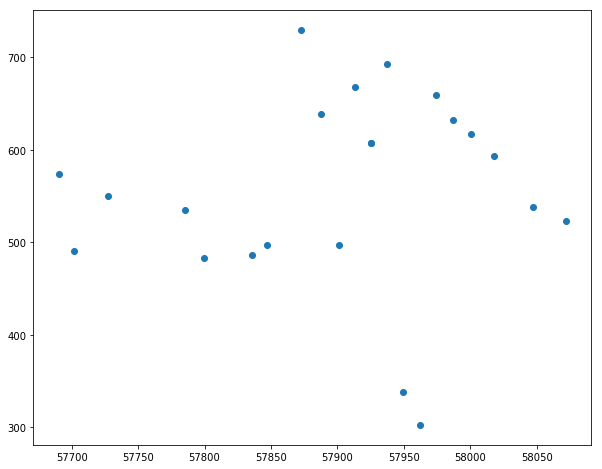

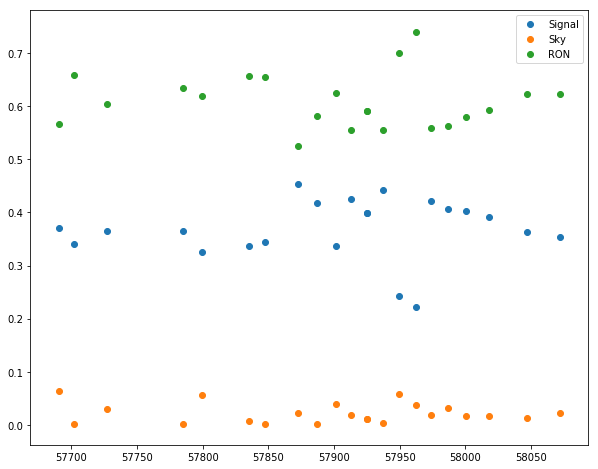

[ 606.91798083  523.17610572  538.06930816  667.76398419  497.03379882
  638.74610408  729.86546281  496.69625308  486.74055329  483.46919982
  534.60611789  549.67465349           nan  593.17785235  490.57816178
  574.18505772  617.03384866  632.4977185   659.23490016  302.58196553
  337.83328863  692.32163334  606.91798083]


In [15]:
plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,1])
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,2],label='Signal')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,3],label='Sky')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,4],label='RON')
plt.legend()
#plt.ylim([5*10**(-15),1.*10**(-14)])
plt.show()

print SNR_part_1[:,1]
np.savetxt('../NOVEMBER/F51_SNR_H.txt',SNR_part_1)

In [16]:
COMB = np.ndarray.tolist(ABS_FLUX_LAMBDA_1_1) + np.ndarray.tolist(ABS_FLUX_LAMBDA_2_1) + np.ndarray.tolist(ABS_FLUX_LAMBDA_3_1)
datelist = date_1 + date_1 + date_1

COMB_array = np.array((datelist,COMB))
print COMB_array[0,:]
np.savetxt('H-NGC3783',COMB_array)

np.savetxt('../NOVEMBER/NOV-F51-H',comp_array)

[ 57925.125694  58072.05243   58047.210656  57913.263924  57901.296854
  57887.336734  57872.349392  57847.220682  57835.347094  57799.339228
  57785.339384  57727.060438  57714.09532   58018.235192  57702.044194
  57690.158498  58000.306002  57987.050398  57974.096442  57962.129334
  57949.164965  57937.189476  57925.125694  57925.125694  58072.05243
  58047.210656  57913.263924  57901.296854  57887.336734  57872.349392
  57847.220682  57835.347094  57799.339228  57785.339384  57727.060438
  57714.09532   58018.235192  57702.044194  57690.158498  58000.306002
  57987.050398  57974.096442  57962.129334  57949.164965  57937.189476
  57925.125694  57925.125694  58072.05243   58047.210656  57913.263924
  57901.296854  57887.336734  57872.349392  57847.220682  57835.347094
  57799.339228  57785.339384  57727.060438  57714.09532   58018.235192
  57702.044194  57690.158498  58000.306002  57987.050398  57974.096442
  57962.129334  57949.164965  57937.189476  57925.125694]


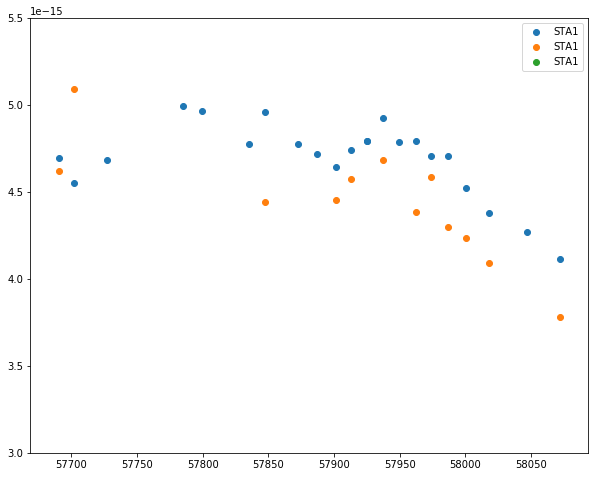

[  4.69280195e-15   4.55152299e-15              nan   4.68524551e-15
   4.99084517e-15   4.96772934e-15   4.77378270e-15   4.96187597e-15
   4.77271883e-15   4.72043590e-15   4.64114132e-15   4.74326774e-15
   4.79409123e-15   4.79409123e-15   4.92341359e-15   4.78485808e-15
   4.79366237e-15   4.70606355e-15   4.70409471e-15   4.52476710e-15
   4.37671316e-15   4.27212124e-15   4.11562870e-15]


In [17]:
plt.figure(figsize=(10,8))
plt.scatter(comp_array[:,0],comp_array[:,1],label='STA1')
plt.scatter(comp_array[:,0],comp_array[:,2],label='STA1')
plt.scatter(comp_array[:,0],comp_array[:,3],label='STA1')
plt.legend()
plt.ylim([3*10**(-15),0.55*10**(-14)])
plt.show()

print comp_array[:,1]

In [18]:
flucompsta1,flucompsta2,flucompsta3,flucompsta4,flucompsta5,flucompsta6,flucompsta7,\
SNR1,SNR2,SNR3,SNR4,SNR5,SNR_comp,ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,ABS_FLUX_V_1,\
ABS_FLUX_V_2,ABS_FLUX_V_3,date,poissonAGN,poissonHD,poisson22,poisson529,SNR_test,file1,SNR_part \
= AGNflux(quasJ,0.001)

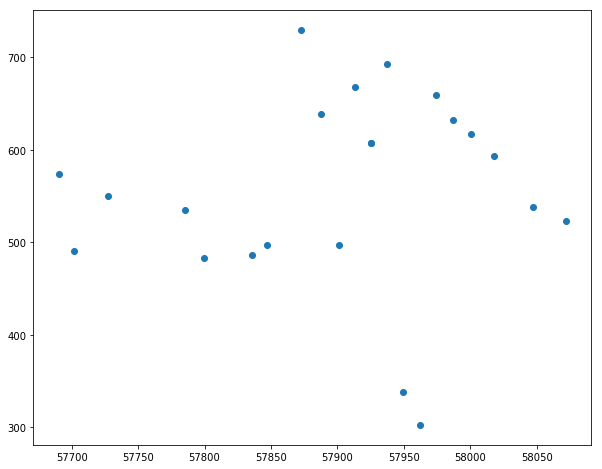

[ 574.18505772  490.57816178           nan  549.67465349  534.60611789
  483.46919982  486.74055329  496.69625308  729.86546281  638.74610408
  497.03379882  667.76398419  606.91798083  606.91798083  692.32163334
  337.83328863  302.58196553  659.23490016  632.4977185   617.03384866
  593.17785235  538.06930816  523.17610572]


In [19]:
plt.figure(figsize=(10,8))
plt.scatter(comp_array[:,0],comp_array[:,4])
plt.show()

print comp_array[:,4]

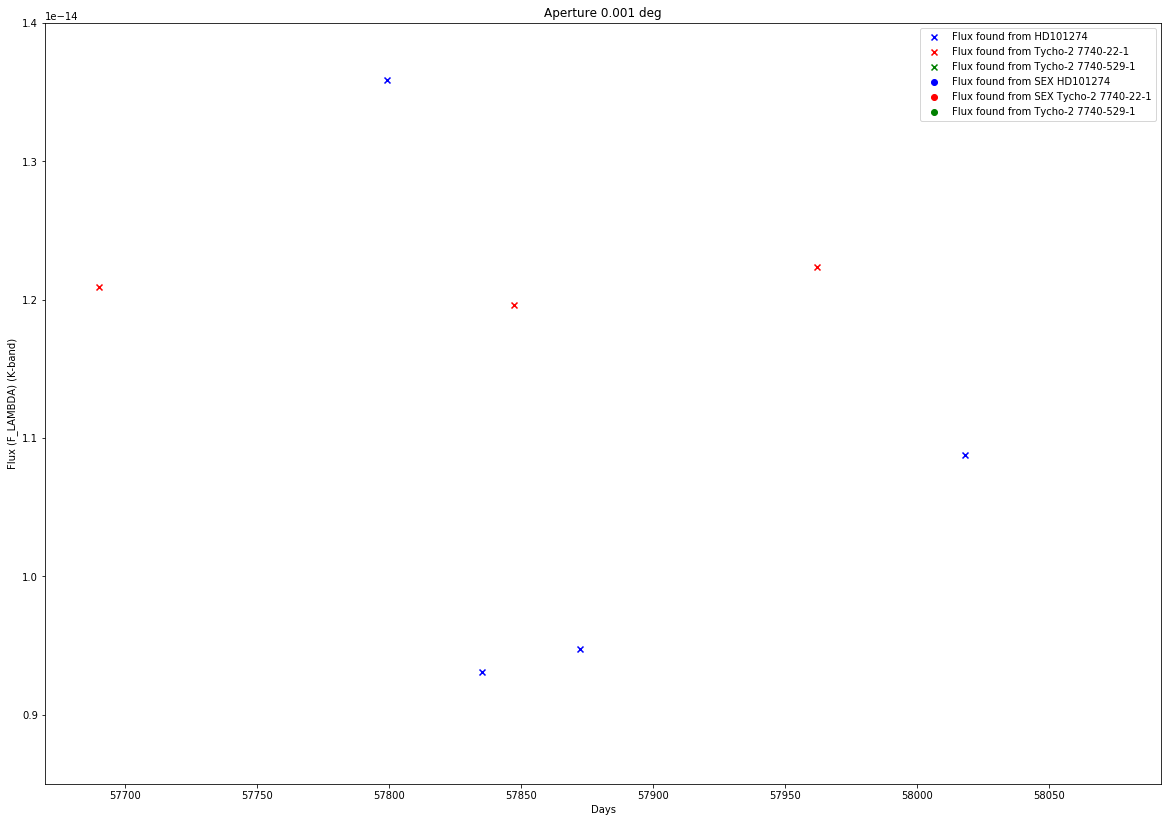

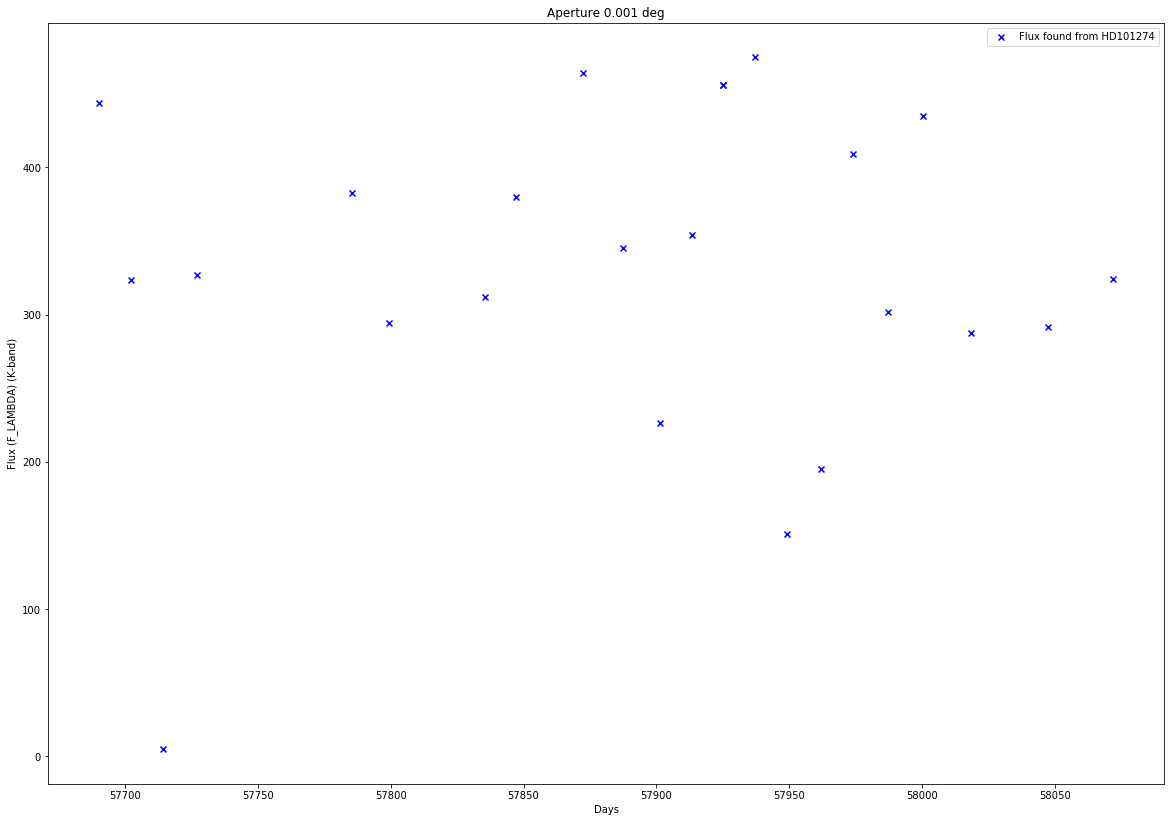

In [20]:
plt.figure(figsize=(20,14))
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_2),marker='x',\
            color='r',label='Flux found from Tycho-2 7740-22-1')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3),marker='x',\
            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.scatter(date_1,ABS_FLUX_LAMBDA_1_1,marker='o',\
            color='b',label='Flux found from SEX HD101274')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_2_1),marker='o',\
            color='r',label='Flux found from SEX Tycho-2 7740-22-1')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3_1),marker='o',\
            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
plt.ylim([0.85*10**(-14),1.4*10**(-14)])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
plt.scatter(date,np.array(SNR1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
#plt.ylim([0.15,0.20])
#plt.xlim([57850,57880])
plt.legend()
plt.show()



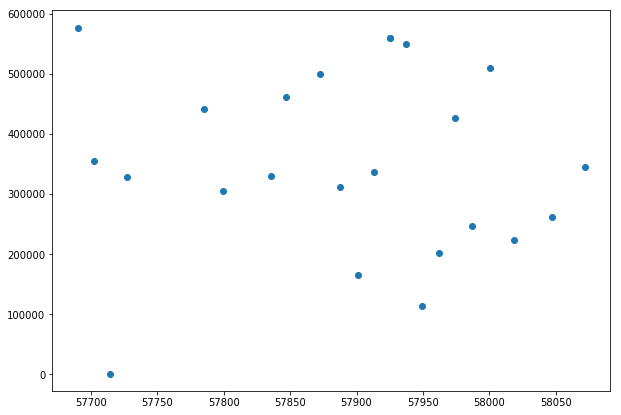

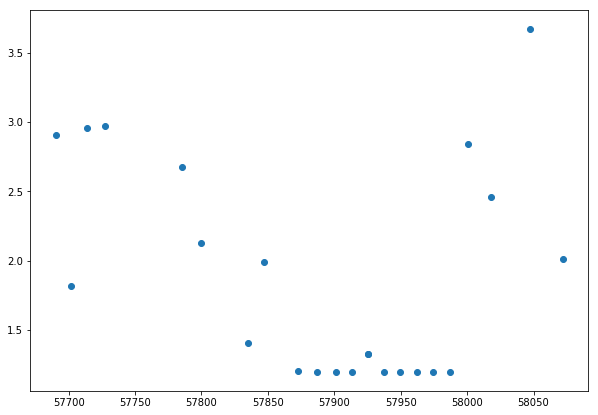

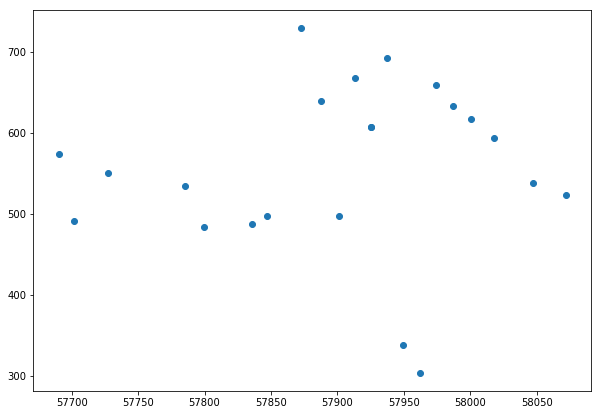

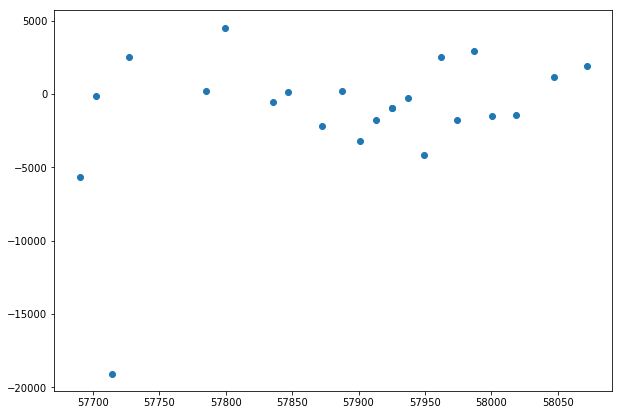

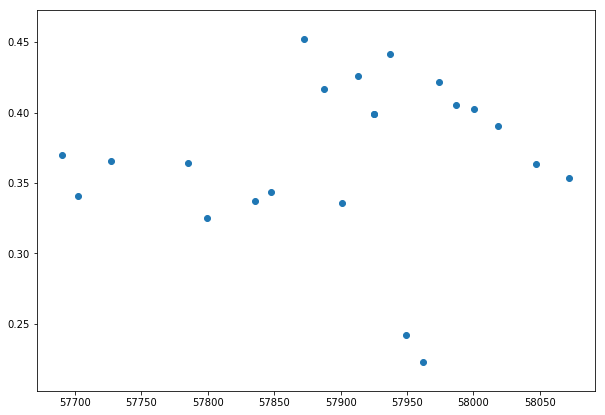

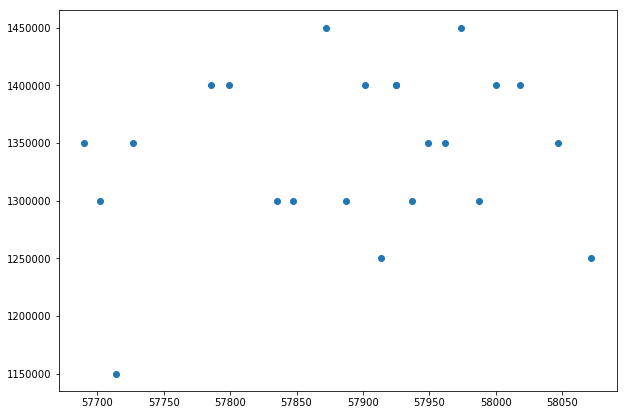

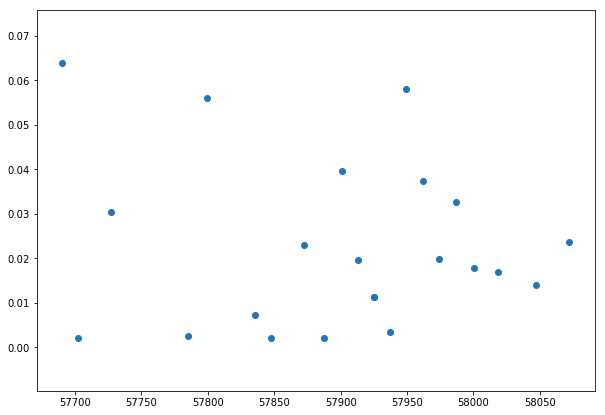

In [21]:
plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,1])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,4])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,1])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,2])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,2])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part[:,0],SNR_part[:,3])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,3])
plt.show()


In [22]:
print np.argmax(SNR_test[:,1])

for i in range(len(file1)):
    print i, '{0:f}'.format(SNR_test[i,0]), '{0:f}'.format(SNR_test[i,1]), '{0:f}'.format(SNR_test[i,2])
    print file1[i]

21
0 57925.125694 455.988145 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/.fuse_hidden0000061100000069
1 58072.052430 323.884334 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits
2 58047.210656 291.790508 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(1)
3 57913.263924 354.069160 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(10)
4 57901.296854 226.704349 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(11)
5 57887.336734 345.046303 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(12)
6 57872.349392 464.237000 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(13)
7 57847.220682 379.992577 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(14)
8 57835.347094 312.197064 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(15)
9 57799.339228 294.211466 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.fits(16)
10 57785.339384 382.686843 5.000000
/media/lynge/Lynge-Back-up/F51/F51H/F51_2_15_H.